<a href="https://colab.research.google.com/github/deepaksaipendyala/Credit-Score-Classification/blob/main/Credit_score_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Authors: P Deepak Sai , CB.EN.U4ELC20049
### Objective: Credit Score Classification, Given a person’s credit-related information, build a machine learning model that can classify the credit score.
### Input: Dataset
### output: Accuracy

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier #KNN classifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split #to split data
from sklearn.model_selection import cross_val_score

import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, plot_confusion_matrix,confusion_matrix,accuracy_score # to get confusion matrix and accuracy

from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.impute import SimpleImputer

%matplotlib inline
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("train.csv")

# Data Preprocessing 

"ID", "Customer_ID", "Name" and "SSN" are unique to the person.  These are removed to reduce the dimensionality of the data.

In [5]:
df.info()
df.drop(columns=["ID", "Customer_ID", "Name", "SSN"], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

# **Feature engineering**

In [6]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


<ul> Modifications to be done: <ul/>
    <li> The string "_" is removed from the entries </li>
    <li> The variable is casted as numeric </li>
    <li> Ages above 100 and below 18 are coded as missing and will be imputed later. This counts for 8.5% of the total observations </li>

In [7]:
df["Age"].value_counts()

38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
471        1
1520       1
8663       1
3363       1
1342       1
Name: Age, Length: 1788, dtype: int64

In [8]:
df["Age"] = df["Age"].str.replace("_", "")

In [9]:
df["Age"] = pd.to_numeric(df["Age"])

In [10]:
#dataprocessing, Less then 18 and greater than 18, we'll modify it to null

for i in range(len(df)):
    if df["Age"][i] > 100 or df["Age"][i] < 18 :
        df["Age"][i] = None    


<ul> Changes made:
<li> The value "_______" is replaced by "Other". This equals 7% of the total data. </li> </ul>

In [11]:
df["Occupation"].value_counts(normalize=True)


_______          0.07062
Lawyer           0.06575
Architect        0.06355
Engineer         0.06350
Scientist        0.06299
Mechanic         0.06291
Accountant       0.06271
Developer        0.06235
Media_Manager    0.06232
Teacher          0.06215
Entrepreneur     0.06174
Doctor           0.06087
Journalist       0.06085
Manager          0.05973
Musician         0.05911
Writer           0.05885
Name: Occupation, dtype: float64

In [12]:
for i in range(len(df)):
    if df["Occupation"][i] == "_______":
        df["Occupation"][i] = "Other"

<ul> Notes and changes <ul/>
    <li> The string "_" is removed from the entries </li>
     <li> The variable is casted as numeric </li>

In [13]:
df["Annual_Income"].value_counts()

36585.12     16
20867.67     16
17273.83     16
9141.63      15
33029.66     15
             ..
20269.93_     1
15157.25_     1
44955.64_     1
76650.12_     1
4262933.0     1
Name: Annual_Income, Length: 18940, dtype: int64

In [14]:
df["Annual_Income"] = df["Annual_Income"].str.replace("_", "")

In [15]:
df["Annual_Income"] = pd.to_numeric(df["Annual_Income"])

<ul> Changes: <ul/>
    <li> Entries above 100 are deleted, assuming they're error. </li>

In [16]:
df["Num_Bank_Accounts"].value_counts()

6       13001
7       12823
8       12765
4       12186
5       12118
        ...  
1626        1
1470        1
887         1
211         1
697         1
Name: Num_Bank_Accounts, Length: 943, dtype: int64

In [17]:
for i in range(len(df)):
    if df["Num_Bank_Accounts"][i] > 100:
        df["Num_Bank_Accounts"][i] = None

<ul> Changes: <ul/>
    <li> Entries above 100 are deleted, assuming they're error. </li>

In [18]:
df["Num_Credit_Card"].value_counts()

5       18459
7       16615
6       16559
4       14030
3       13277
        ...  
791         1
1118        1
657         1
640         1
679         1
Name: Num_Credit_Card, Length: 1179, dtype: int64

In [19]:
for i in range(len(df)):
    if df["Num_Credit_Card"][i] > 100:
        df["Num_Credit_Card"][i] = None

<ul> Changes: <ul/>
    <li> Entries above 50 are thought to be coded erronously and are set to NaN </li>

In [20]:
df["Interest_Rate"].value_counts().sort_index()

1       2683
2       2465
3       2765
4       2589
5       4979
        ... 
5775       1
5776       1
5788       1
5789       1
5797       1
Name: Interest_Rate, Length: 1750, dtype: int64

In [21]:
for i in range(len(df)):
    if df["Interest_Rate"][i] > 100:
        df["Interest_Rate"][i] = None

<ul> Changes made to dataset <ul/>
    <li> The string "_" is removed from the entries </li>
    <li> The variable is casted as numeric </li>
    <li> The value -100 is considered erronous and is set to NaN </li>
    <li> Values above 50 are considered erronous and is set to NaN </li>

In [22]:
df["Num_of_Loan"].value_counts()

3        14386
2        14250
4        14016
0        10380
1        10083
         ...  
1320_        1
103          1
1444         1
392          1
966          1
Name: Num_of_Loan, Length: 434, dtype: int64

In [23]:
df["Num_of_Loan"] = df["Num_of_Loan"].str.replace("_", "")
df["Num_of_Loan"] = pd.to_numeric(df["Num_of_Loan"])

In [24]:
for i in range(len(df)):
    if df["Num_of_Loan"][i] > 50 or df["Num_of_Loan"][i] == -100:
        df["Num_of_Loan"][i] = None

In [25]:
df["Type_of_Loan"].value_counts()

Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                 8
Payday Loan, Mortgage Loan,

<ul> Notes and changes <ul/>
    <li> No changes are made </li>
    <li> Negative values are assumed to be upfront payments, although they might also be erronous.  </li>


In [26]:
df["Delay_from_due_date"].value_counts().sort_index()

-5      33
-4      62
-3     118
-2     168
-1     210
      ... 
 63     69
 64     64
 65     56
 66     32
 67     22
Name: Delay_from_due_date, Length: 73, dtype: int64

<ul> Notes and changes <ul/>
    <li> The string "_" is removed from the entries </li>
    <li> The variable is casted as numeric </li>



In [27]:
df["Num_of_Delayed_Payment"].value_counts().sort_index()

-1     308
-1_      8
-2     223
-2_     11
-3      91
      ... 
972      1
974      1
98       1
996      1
9_     147
Name: Num_of_Delayed_Payment, Length: 749, dtype: int64

In [28]:
df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].str.replace("_", "")
df["Num_of_Delayed_Payment"] = pd.to_numeric(df["Num_of_Delayed_Payment"])

<ul> Notes and changes <ul/>
    <li> The value _ is considered erronous and is set to NaN </li>


In [29]:
df["Changed_Credit_Limit"].value_counts().sort_index()

-0.009999999999999787       4
-0.01999999999999957        3
-0.020000000000000014       3
-0.029999999999999805       1
-0.030000000000000027       1
                         ... 
9.97                       97
9.98                       63
9.989999999999998           2
9.99                       80
_                        2091
Name: Changed_Credit_Limit, Length: 4384, dtype: int64

In [30]:
for i in range(len(df)):
    if df["Changed_Credit_Limit"][i] == "_" :
        df["Changed_Credit_Limit"][i] = None

In [31]:
df["Num_Credit_Inquiries"].value_counts().sort_index()

0.0        6972
1.0        7588
2.0        8028
3.0        8890
4.0       11271
          ...  
2588.0        1
2589.0        2
2592.0        2
2594.0        1
2597.0        1
Name: Num_Credit_Inquiries, Length: 1223, dtype: int64

In [32]:
df["Credit_Mix"].value_counts()

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [33]:
for i in range(len(df)):
    if df["Credit_Mix"][i] == "_" :
        df["Credit_Mix"][i] = None

<ul> Notes and changes <ul/>
    <li> The string "_" is removed from the entries </li>
    <li> The variable is casted as numeric </li>

In [34]:
df["Outstanding_Debt"].value_counts().sort_index()

0.23      8
0.34      8
0.54      8
0.56      8
0.77      8
         ..
998.95    8
999.12    8
999.25    8
999.36    8
999.48    8
Name: Outstanding_Debt, Length: 13178, dtype: int64

In [35]:
df["Outstanding_Debt"] = df["Outstanding_Debt"].str.replace("_", "")
df["Outstanding_Debt"] = pd.to_numeric(df["Outstanding_Debt"])

In [36]:
df["Credit_Utilization_Ratio"].value_counts()

26.822620    1
28.327949    1
30.016576    1
25.478841    1
33.933755    1
            ..
30.687138    1
38.730069    1
30.017515    1
27.279794    1
34.192463    1
Name: Credit_Utilization_Ratio, Length: 100000, dtype: int64

In [37]:
df["Credit_History_Age"].value_counts()

15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 7 Months      14
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: Credit_History_Age, Length: 404, dtype: int64

In [38]:
df["Credit_History_Age"].fillna(0, inplace=True)


<ul> Notes and changes <ul/>
    <li> The years and months are coded as total months </li>
    <li> The variable is casted as numeric </li>

In [39]:
#processing total years and months in words to total months in int 

for m in range(len(df)):
    
    i = df["Credit_History_Age"][m]
    if i != 0:
        total_months = 0
        total_months += int(i.split("Years")[0]) * 12
        total_months += int((re.match(r"^.*and (.*) Months.*$", i)).group(1))
        df["Credit_History_Age"][m] = total_months


In [40]:
df["Credit_History_Age"] = pd.to_numeric(df["Credit_History_Age"])

In [41]:
df["Payment_of_Min_Amount"].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

In [42]:
df["Total_EMI_per_month"].value_counts().sort_index()

0.000000        10613
4.462837            8
4.713184            8
4.865690            8
4.916139            8
                ...  
82193.000000        1
82204.000000        1
82236.000000        1
82256.000000        1
82331.000000        1
Name: Total_EMI_per_month, Length: 14950, dtype: int64

In [43]:
df["Amount_invested_monthly"].value_counts()

__10000__             4305
0.0                    169
80.41529543900253        1
36.66235139442514        1
89.7384893604547         1
                      ... 
36.541908593249026       1
93.45116318631192        1
140.80972223052834       1
38.73937670100975        1
167.1638651610451        1
Name: Amount_invested_monthly, Length: 91049, dtype: int64

<ul> Notes and changes <ul/>
    <li> The string "_" is removed from the entries </li>
    <li> The variable is casted as numeric </li>
    <li> The value 10000 is considered erronous and is coded as None </li>

In [44]:
df["Amount_invested_monthly"] = df["Amount_invested_monthly"].str.replace("_", "")
df["Amount_invested_monthly"] = pd.to_numeric(df["Amount_invested_monthly"])

In [45]:
df["Payment_Behaviour"].value_counts()


Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

<ul> Notes and changes <ul/>
    <li> The value "x!@9#%8" is recoded to "Other" </li>

In [46]:
#The value "x!@9#%8" is recoded to "Other"

for i in range(len(df)):
    if df["Payment_Behaviour"][i] == "!@9#%8":
        df["Payment_Behaviour"][i] = "Other"

In [47]:
df["Monthly_Balance"].value_counts()

__-333333333333333333333333333__    9
312.49408867943663                  1
415.32532309844316                  1
252.08489793906085                  1
254.9709216273975                   1
                                   ..
366.2890379762706                   1
151.1882696261166                   1
306.75027851710234                  1
278.8720257394474                   1
393.6736955618808                   1
Name: Monthly_Balance, Length: 98792, dtype: int64

<ul> Notes and changes <ul/>
    <li> The string "__-333333333333333333333333333__" is consider erronous and is coded as None </li>
    <li> The variable is casted as numeric </li>


In [48]:
for i in range(len(df)):
    if df["Monthly_Balance"][i] == "__-333333333333333333333333333__":
        df["Monthly_Balance"][i] = None

In [49]:
df["Monthly_Balance"] = pd.to_numeric(df["Monthly_Balance"])

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       91518 non-null   float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         98754 non-null   float64
 6   Num_Credit_Card           97870 non-null   float64
 7   Interest_Rate             97988 non-null   float64
 8   Num_of_Loan               95670 non-null   float64
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   float64
 12  Changed_Credit_Limit      97909 non-null   object 
 13  Num_Credit_Inquiries      98035 non-null   fl

In [51]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,None,809.98,26.822620,265,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,February,23.0,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,March,NaN,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,267,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,April,23.0,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,268,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,May,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,269,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [52]:
# Recoding Credit_score to :
# Poor - 0 : Standard - 1 : Good - 2

scale_mapper = {"Poor":0, "Standard":1, "Good":2}
df["Credit_Score"] = df["Credit_Score"].replace(scale_mapper)

In [53]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,None,809.98,26.822620,265,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2
1,February,23.0,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,2
2,March,NaN,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,267,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,2
3,April,23.0,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,268,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,2
4,May,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,269,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,2


In [54]:
df.dtypes

Month                        object
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age            int64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                  int64
dtype: object

In [55]:
df.count()

Month                       100000
Age                          91518
Occupation                  100000
Annual_Income               100000
Monthly_Inhand_Salary        84998
Num_Bank_Accounts            98754
Num_Credit_Card              97870
Interest_Rate                97988
Num_of_Loan                  95670
Type_of_Loan                 88592
Delay_from_due_date         100000
Num_of_Delayed_Payment       92998
Changed_Credit_Limit         97909
Num_Credit_Inquiries         98035
Credit_Mix                   79805
Outstanding_Debt            100000
Credit_Utilization_Ratio    100000
Credit_History_Age          100000
Payment_of_Min_Amount       100000
Total_EMI_per_month         100000
Amount_invested_monthly      95521
Payment_Behaviour           100000
Monthly_Balance              98791
Credit_Score                100000
dtype: int64

In [56]:
df.isna().sum()

Month                           0
Age                          8482
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts            1246
Num_Credit_Card              2130
Interest_Rate                2012
Num_of_Loan                  4330
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1209
Credit_Score                    0
dtype: int64

In [58]:
data_set=df

In [59]:
data_set=data_set.fillna(data_set.mean())

In [60]:
data_set.count()

Month                       100000
Age                         100000
Occupation                  100000
Annual_Income               100000
Monthly_Inhand_Salary       100000
Num_Bank_Accounts           100000
Num_Credit_Card             100000
Interest_Rate               100000
Num_of_Loan                 100000
Type_of_Loan                 88592
Delay_from_due_date         100000
Num_of_Delayed_Payment      100000
Changed_Credit_Limit         97909
Num_Credit_Inquiries        100000
Credit_Mix                   79805
Outstanding_Debt            100000
Credit_Utilization_Ratio    100000
Credit_History_Age          100000
Payment_of_Min_Amount       100000
Total_EMI_per_month         100000
Amount_invested_monthly     100000
Payment_Behaviour           100000
Monthly_Balance             100000
Credit_Score                100000
dtype: int64

In [61]:
data_set.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23.000000,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,None,809.98,26.822620,265,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2
1,February,23.000000,Scientist,19114.12,4194.170850,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,2
2,March,34.429817,Scientist,19114.12,4194.170850,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,267,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,2
3,April,23.000000,Scientist,19114.12,4194.170850,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,268,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,2
4,May,23.000000,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,269,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,2


In [62]:
data_set.dtypes

Month                        object
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age            int64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                  int64
dtype: object

In [63]:
# Creating a instance of label Encoder.
le = LabelEncoder()

data_set['Month'] = le.fit_transform(data_set['Month'])
data_set['Occupation'] = le.fit_transform(data_set['Occupation'])
data_set['Type_of_Loan'] = le.fit_transform(data_set['Type_of_Loan'])
data_set['Changed_Credit_Limit'] = le.fit_transform(data_set['Changed_Credit_Limit'])
data_set['Payment_of_Min_Amount'] = le.fit_transform(data_set['Payment_of_Min_Amount'])
data_set['Payment_Behaviour'] = le.fit_transform(data_set['Payment_Behaviour'])
data_set['Credit_Mix'] = le.fit_transform(data_set['Credit_Mix'])


In [64]:
data_set.count()

Month                       100000
Age                         100000
Occupation                  100000
Annual_Income               100000
Monthly_Inhand_Salary       100000
Num_Bank_Accounts           100000
Num_Credit_Card             100000
Interest_Rate               100000
Num_of_Loan                 100000
Type_of_Loan                100000
Delay_from_due_date         100000
Num_of_Delayed_Payment      100000
Changed_Credit_Limit        100000
Num_Credit_Inquiries        100000
Credit_Mix                  100000
Outstanding_Debt            100000
Credit_Utilization_Ratio    100000
Credit_History_Age          100000
Payment_of_Min_Amount       100000
Total_EMI_per_month         100000
Amount_invested_monthly     100000
Payment_Behaviour           100000
Monthly_Balance             100000
Credit_Score                100000
dtype: int64

In [65]:
data_set.count()

Month                       100000
Age                         100000
Occupation                  100000
Annual_Income               100000
Monthly_Inhand_Salary       100000
Num_Bank_Accounts           100000
Num_Credit_Card             100000
Interest_Rate               100000
Num_of_Loan                 100000
Type_of_Loan                100000
Delay_from_due_date         100000
Num_of_Delayed_Payment      100000
Changed_Credit_Limit        100000
Num_Credit_Inquiries        100000
Credit_Mix                  100000
Outstanding_Debt            100000
Credit_Utilization_Ratio    100000
Credit_History_Age          100000
Payment_of_Min_Amount       100000
Total_EMI_per_month         100000
Amount_invested_monthly     100000
Payment_Behaviour           100000
Monthly_Balance             100000
Credit_Score                100000
dtype: int64

In [66]:
data_set.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3,23.000000,13,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,3,809.98,26.822620,265,1,49.574949,80.415295,2,312.494089,2
1,2,23.000000,13,19114.12,4194.170850,3.0,4.0,3.0,4.0,128,...,1,809.98,31.944960,0,1,49.574949,118.280222,3,284.629162,2
2,6,34.429817,13,19114.12,4194.170850,3.0,4.0,3.0,4.0,128,...,1,809.98,28.609352,267,1,49.574949,81.699521,4,331.209863,2
3,0,23.000000,13,19114.12,4194.170850,3.0,4.0,3.0,4.0,128,...,1,809.98,31.377862,268,1,49.574949,199.458074,5,223.451310,2
4,7,23.000000,13,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,...,1,809.98,24.797347,269,1,49.574949,41.420153,1,341.489231,2


## **Saving Processed Data as "Processeddata.csv"**

In [67]:
data_set.to_csv('Processeddata.csv')


In [68]:
data_set.dropna(subset=["Credit_Mix"], inplace=True)


## Taking a sample of 5000 from dataset as per our faculty instructions.

In [69]:
mdata=data_set.sample(5000)

In [ ]:
mdata = np.round(mdata, decimals=2) # rouding all values in dataset to 2 decimal places
mdata.head() # first 5 values in dataset

In [70]:
scaled = MinMaxScaler()
scaled. fit(mdata.drop('Credit_Score',axis=1))
dset_modified=scaled. transform(mdata.drop('Credit_Score',axis=1)) #dropping class—feature
data_set_feat = pd.DataFrame(dset_modified, columns=data_set.columns[:-1])
data_set_feat = np.round(data_set_feat, decimals=2) #rounding all values to 2 decimals
data_set_feat.head() #dataset_after_normalization
one_train, one_test, two_train, two_test = train_test_split(mdata,mdata['Credit_Score'],test_size=0.30)

In [71]:
# Computation of accuracy rates for various neighbour values
Accurate_rates = []
for i in range(1,40):
    k_nearest_neighbour = KNeighborsClassifier(n_neighbors=i)
    final_score=cross_val_score(k_nearest_neighbour, data_set_feat,mdata['Credit_Score'],cv=10)
    Accurate_rates.append(final_score.mean())

Text(0, 0.5, 'Accuracy Rate')

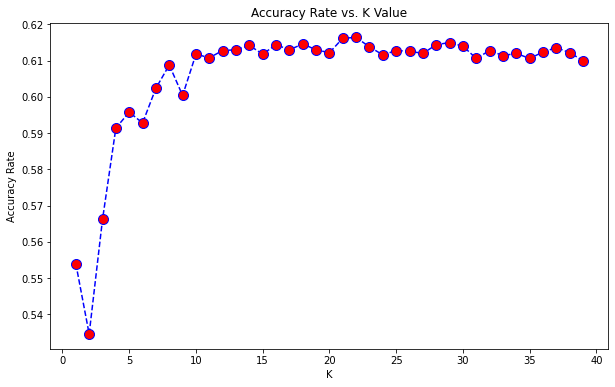

In [72]:
plt.figure(figsize=(10,6))

plt.plot(range(1,40),Accurate_rates, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)

plt.title('Accuracy Rate vs. K Value')

plt.xlabel('K')

plt.ylabel( 'Accuracy Rate')

In [81]:
# Split data into X & y
X = mdata.drop("Credit_Score", axis=1)
y = mdata["Credit_Score"]

# Split data into train and teset sets
np.random.seed(42)
one_train, one_test, two_train, two_test = train_test_split(X, y, test_size=0.2)

In [82]:
max_index = Accurate_rates. index(max(Accurate_rates)) # Best case identifier
k_nearest_neighbour = KNeighborsClassifier(n_neighbors=max_index)

k_nearest_neighbour.fit(one_train,two_train)
prediction = k_nearest_neighbour. predict (one_test)

print('For K=',max_index)

print('Confusion matrix:')

print('\n')

print(confusion_matrix(two_test,prediction)) # Confusion Matrix

print('\n')
print('Accuracy rate:',round(accuracy_score(two_test,prediction),2)*100,'%')

For K= 21
Confusion matrix:


[[106 149  16]
 [ 90 447  26]
 [ 10 139  17]]


Accuracy rate: 56.99999999999999 %


In [83]:
t = 30 # Random K value

k_nearest_neighbour = KNeighborsClassifier(n_neighbors=t)
k_nearest_neighbour. fit(one_train, two_train)
prediction = k_nearest_neighbour.predict(one_test)

print('For K=',t)

print('Confusion matrix:')

print('\n')

print (confusion_matrix(two_test, prediction) )
print('\n')
print('Accuracy rate:',round(accuracy_score(two_test,prediction),2)*100,'%')


For K= 30
Confusion matrix:


[[ 99 164   8]
 [ 84 463  16]
 [ 11 142  13]]


Accuracy rate: 56.99999999999999 %


In [84]:
scaled = MinMaxScaler()


In [85]:
scaled. fit(mdata.drop('Credit_Score',axis=1))

MinMaxScaler()

In [86]:
dset_modified=scaled. transform(mdata.drop('Credit_Score',axis=1)) #dropping class—feature

In [87]:
data_set_feat = pd.DataFrame(dset_modified, columns=data_set.columns[:-1])

In [88]:
data_set_feat = np.round(data_set_feat, decimals=2) #rounding all values to 2 decimals

data_set_feat.head() #dataset_after_normalization

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0.86,0.84,0.13,0.00,0.26,0.09,0.05,0.15,0.00,1.00,...,0.0,0.67,0.20,0.71,0.80,0.0,0.0,0.00,0.00,0.59
1,0.71,0.55,0.13,0.00,0.69,0.00,0.01,0.11,0.13,0.44,...,0.0,0.33,0.24,0.53,0.84,0.5,0.0,0.09,0.67,0.14
2,0.43,0.71,0.07,0.00,0.09,0.08,0.05,0.14,0.13,0.13,...,0.0,0.33,0.07,0.65,0.73,0.0,0.0,0.02,0.83,0.14
3,0.71,0.05,0.87,0.00,0.13,0.06,0.05,0.01,0.04,0.89,...,0.0,0.33,0.30,0.68,0.79,0.5,0.0,0.03,0.83,0.15
4,0.86,0.37,0.87,0.01,0.26,0.03,0.05,0.14,0.09,1.00,...,0.0,0.33,0.25,0.35,0.53,0.5,0.0,0.07,1.00,0.48


In [89]:
# Split data into X & y
X = mdata.drop("Credit_Score", axis=1)
y = mdata["Credit_Score"]

# Split data into train and teset sets
np.random.seed(42)
one_train, one_test, two_train, two_test = train_test_split(X, y, test_size=0.2) # test_train split with test size =30% and train size =70%

In [90]:
# Computation of accuracy rates for various neighbour values
Accurate_rates = []
for i in range(1,40):
    k_nearest_neighbour = KNeighborsClassifier(n_neighbors=i)
    final_score=cross_val_score(k_nearest_neighbour, data_set_feat,mdata['Credit_Score'],cv=10)
    Accurate_rates.append(final_score.mean())

Text(0, 0.5, 'Accuracy Rate')

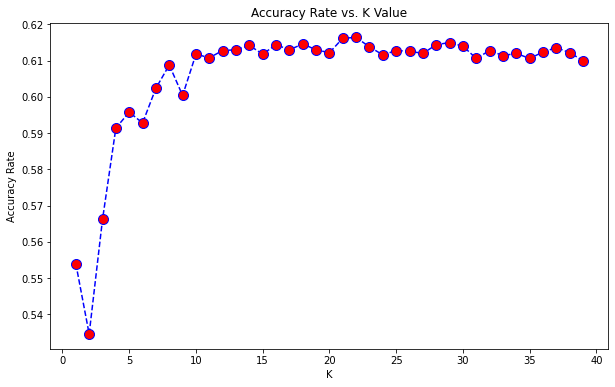

In [91]:
plt.figure(figsize=(10,6))

plt.plot(range(1,40),Accurate_rates, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)

plt.title('Accuracy Rate vs. K Value')

plt.xlabel('K')

plt.ylabel( 'Accuracy Rate')

## Using Scikit-Learn's Pipeline() class for filling missing data and encoding categorical data


In [92]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,None,809.98,26.822620,265,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2
1,February,23.0,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,2
2,March,NaN,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,267,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,2
3,April,23.0,Scientist,19114.12,NaN,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,268,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,2
4,May,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,269,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,2


In [98]:
df.dtypes

Month                        object
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age            int64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                  int64
dtype: object

In [104]:
df.isna().sum()


Month                           0
Age                          8482
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts            1246
Num_Credit_Card              2130
Interest_Rate                2012
Num_of_Loan                  4330
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1209
Credit_Score                    0
dtype: int64

In [106]:
df.dropna(inplace=True)


In [107]:
df.isna().sum()


Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [126]:
# Recoding Credit_Mix to :
# Poor - 0 : Standard - 1 : Good - 2

scale_mapper = {"Bad":0, "Standard":1, "Good":2}
df["Credit_Mix"] = df["Credit_Mix"].replace(scale_mapper)

In [141]:
df.isnull()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99986,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99989,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99991,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [143]:
# Split data into X & y
X = df.drop("Credit_Score", axis=1)
y = df["Credit_Score"]

In [144]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer # this will help us fill missing values
from sklearn.preprocessing import OneHotEncoder # this will help us turn our categorical variables into numbers

# Define categorical columns
categorical_features = ["Month","Occupation","Type_of_Loan","Changed_Credit_Limit","Payment_Behaviour"]
# Create categorical transformer (imputes missing values, then one hot encodes them)
categorical_transformer = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
  ('onehot', OneHotEncoder(handle_unknown='ignore'))                                         
])

# Define numeric features
numeric_features = ["Age","Num_Bank_Accounts","Monthly_Inhand_Salary","Num_Credit_Card","Interest_Rate",
                   "Delay_from_due_date","Num_Credit_Inquiries","Credit_Utilization_Ratio",
                   "Total_EMI_per_month","Annual_Income","Num_of_Loan","Num_of_Delayed_Payment","Credit_Mix",
                   "Outstanding_Debt","Credit_History_Age",
                   "Amount_invested_monthly","Monthly_Balance"]
# Create a transformer for filling all missing numeric values with the mean
numeric_transformer = Pipeline(steps=[
  ('imputer', SimpleImputer(strategy='mean'))  
])

In [145]:
from sklearn.compose import ColumnTransformer

# Create a column transformer which combines all of the other transformers 
# into one step
preprocessor = ColumnTransformer(
    transformers=[
      # (name, transformer_to_use, features_to_use transform)
      ('categorical', categorical_transformer, categorical_features),
      ('numerical', numeric_transformer, numeric_features)
])

In [146]:
# Create the preprocessing and modelling pipeline
model = Pipeline(steps=[('preprocessor', preprocessor), # this will fill our missing data and make sure it's all numbers
                        ('classifier', KNeighborsClassifier())]) # this will model our data

In [147]:
from sklearn.model_selection import train_test_split

# Split data into train and teset sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model on the training data 
# (note: when fit() is called with a Pipeline(), fit_transform() is used for transformers)
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Month', 'Occupation',
                                                   'Type_of_Loan',
                                                   'Changed_Credit_Limit',
                                                   'Payment_Behaviour']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputer',

In [148]:
# Score the model on the data 
# (note: when score() or  predict() is called with a Pipeline(), transform() is used for transformers)
model.score(X_test, y_test)

0.633733493397359

## Comparing the metrics of different Scikit-Learn models


In [149]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split